## Lights out

### Les fonctions de base

La matrice directement dépliée :

In [1]:
def bouton_to_lumiere(n):
    V = matrix(GF(2), n**2, n**2)
    for i in range(n):
        for j in range(n):
            k = i*n + j
            V[k,k] = 1
            if i != 0:
                V[k-n, k] = 1
            if j != n-1:
                V[k+1, k] = 1
            if i != n-1:
                V[k+n, k] = 1
            if j != 0:
                V[k-1, k] = 1
    return V

In [2]:
bouton_to_lumiere(3)

[1 1 0 1 0 0 0 0 0]
[1 1 1 0 1 0 0 0 0]
[0 1 1 0 0 1 0 0 0]
[1 0 0 1 1 0 1 0 0]
[0 1 0 1 1 1 0 1 0]
[0 0 1 0 1 1 0 0 1]
[0 0 0 1 0 0 1 1 0]
[0 0 0 0 1 0 1 1 1]
[0 0 0 0 0 1 0 1 1]

Vecteur objectif (tout allumé) :

In [3]:
def objectif(n):
    return matrix.ones(GF(2), n**2, 1)

In [4]:
objectif(3)

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]

Dessiner une colonne sous forme de grille :

In [5]:
def grille(col):
    v = vector(col)
    taille = ZZ(sqrt(len(v)))
    return matrix(GF(2), taille, taille, v)

In [6]:
grille(objectif(3))

[1 1 1]
[1 1 1]
[1 1 1]

#### Une solution

In [7]:
def one_sol(n):
    return bouton_to_lumiere(n).solve_right(objectif(n))

In [8]:
grille(one_sol(3))

[1 0 1]
[0 1 0]
[1 0 1]

#### Toutes les solutions

In [9]:
def all_sols(n):
    K = bouton_to_lumiere(n).right_kernel()
    sol = one_sol(n)
    return [vector(sol) + k for k in K]

In [10]:
all_sols(3)

[(1, 0, 1, 0, 1, 0, 1, 0, 1)]

In [11]:
all_sols(5)

[(0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0),
 (1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0),
 (1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1)]

#### Dessiner la liste des solutions

In [12]:
for s in all_sols(5):
    print(grille(s))

[0 1 1 0 1]
[0 1 1 1 0]
[0 0 1 1 1]
[1 1 0 1 1]
[1 1 0 0 0]
[1 1 0 0 0]
[1 1 0 1 1]
[0 0 1 1 1]
[0 1 1 1 0]
[0 1 1 0 1]
[0 0 0 1 1]
[1 1 0 1 1]
[1 1 1 0 0]
[0 1 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[0 1 1 1 0]
[1 1 1 0 0]
[1 1 0 1 1]
[0 0 0 1 1]


Il manque les espaces, on les fait rajouter par la fonction `print` :

In [13]:
for s in all_sols(5):
    print(grille(s), end='\n\n')

[0 1 1 0 1]
[0 1 1 1 0]
[0 0 1 1 1]
[1 1 0 1 1]
[1 1 0 0 0]

[1 1 0 0 0]
[1 1 0 1 1]
[0 0 1 1 1]
[0 1 1 1 0]
[0 1 1 0 1]

[0 0 0 1 1]
[1 1 0 1 1]
[1 1 1 0 0]
[0 1 1 1 0]
[1 0 1 1 0]

[1 0 1 1 0]
[0 1 1 1 0]
[1 1 1 0 0]
[1 1 0 1 1]
[0 0 0 1 1]



C'est un peu long, est-ce que par hasard, le rendu des listes prend en charge les matrices ?

In [14]:
[grille(s) for s in all_sols(5)]

[
[0 1 1 0 1]  [1 1 0 0 0]  [0 0 0 1 1]  [1 0 1 1 0]
[0 1 1 1 0]  [1 1 0 1 1]  [1 1 0 1 1]  [0 1 1 1 0]
[0 0 1 1 1]  [0 0 1 1 1]  [1 1 1 0 0]  [1 1 1 0 0]
[1 1 0 1 1]  [0 1 1 1 0]  [0 1 1 1 0]  [1 1 0 1 1]
[1 1 0 0 0], [0 1 1 0 1], [1 0 1 1 0], [0 0 0 1 1]
]

#### Les solutions minimales

On se dit que Sage sait calculer la norme 1 d'un vecteur.

In [15]:
v = all_sols(5)[0]
v

(0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0)

In [16]:
v.norm(1)

ArithmeticError: absolute value not defined on integers modulo n.

On lit le message d'erreur : ``ArithmeticError: absolute value not defined on integers modulo n.``, on « remonte » le vecteur dans $\mathbb{Z}$

In [17]:
v.change_ring(ZZ).norm(1)

15

On vérifie à la main qu'il y a bien 15 `1` dans le vecteur précédent, OK.

Les solutions minimales :

In [18]:
def mins_sols(n):
    minsize = oo
    minsols = []
    for s in all_sols(n):
        size = s.change_ring(ZZ).norm(1)
        if size == minsize:
            minsols.append(s)
        elif size < minsize:
            minsols = [s]
            minsize = size
    return minsols

Remarque : ayant eu la flemme de partir d'une borne evidente sur la taille de l'ensemble des solutions (en l'occurrence $2^{n^2}$), on est parti d'une borne infinie:

In [19]:
oo

+Infinity

In [20]:
Infinity == oo

True

In [21]:
mins_sols(5)

[(0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0),
 (1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0),
 (1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1)]

In [22]:
mins_sols(4)

[(0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0),
 (0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0)]

In [23]:
all_sols(4)

[(1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0),
 (0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1),
 (1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0),
 (1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1),
 (0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0),
 (1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1),
 (1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0),
 (0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1),
 (0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0),
 (1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1),
 (0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1)]

### Avoir une fonction facilement utilisable qui donne toutes les infos.

In [24]:
def infos(n):
    dim = bouton_to_lumiere(n).right_kernel().dimension()
    print("L'espace des solutions est un espace affine de dimension {}".format(dim))
    print("L'espace des solutions est de cardinal {}".format(2^dim))
    minsols = mins_sols(n)
    print("Le nombre de solutions minimales est {}".format(len(minsols)))
    print("Les solutions minimales sont :")
    pretty_print([grille(s) for s in mins_sols(n)])

In [25]:
infos(5)

L'espace des solutions est un espace affine de dimension 2
L'espace des solutions est de cardinal 4
Le nombre de solutions minimales est 4
Les solutions minimales sont :


[
[0 1 1 0 1]  [1 1 0 0 0]  [0 0 0 1 1]  [1 0 1 1 0]
[0 1 1 1 0]  [1 1 0 1 1]  [1 1 0 1 1]  [0 1 1 1 0]
[0 0 1 1 1]  [0 0 1 1 1]  [1 1 1 0 0]  [1 1 1 0 0]
[1 1 0 1 1]  [0 1 1 1 0]  [0 1 1 1 0]  [1 1 0 1 1]
[1 1 0 0 0], [0 1 1 0 1], [1 0 1 1 0], [0 0 0 1 1]
]

On en fait un interact pour pouvoir facilement faire varier n:

In [26]:
@interact
def infos(n=slider(1, 20, default=5)):
    dim = bouton_to_lumiere(n).right_kernel().dimension()
    print("L'espace des solutions est un espace affine de dimension {}".format(dim))
    print("L'espace des solutions est de cardinal {}".format(2^dim))
    minsols = mins_sols(n)
    print("Le nombre de solutions minimales est {}".format(len(minsols)))
    print("Les solutions minimales sont :")
    graphics_array([[grille(s).plot() for s in mins_sols(n)]]).show()

Interactive function <function infos at 0x7f3128dd6700> with 1 widget
  n: TransformIntSlider(value=5, descrip…

### Conjecturer

On voit que le nombre de solutions varie selon l'entier, on voit par exemple que pour n=4 et n=9 on a beaucoup de solutions, on se dit qu'il y a peut-être moyen d'explorer tout ça, que les carrés ont un rôle important.

On commence par stocker les dimensions des solutions pour chaque n dans un dictionnaire une fois pour toutes de sorte à pouvoir jouer avec ensuite.

In [27]:
D = {n:bouton_to_lumiere(n).right_kernel().dimension() for n in range(100)}

On regarde à quoi ça ressemble

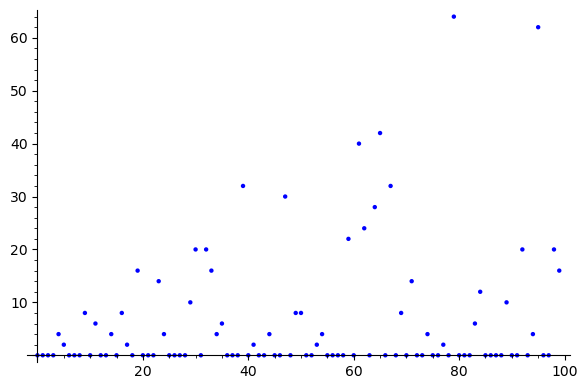

In [28]:
points(D.items())

La structure ne saute pas aux yeux.

On peut lister les tailles ayant plusieurs solutions

In [29]:
nontriv = [i for i in D if D[i] > 0]

In [30]:
nontriv

[4,
 5,
 9,
 11,
 14,
 16,
 17,
 19,
 23,
 24,
 29,
 30,
 32,
 33,
 34,
 35,
 39,
 41,
 44,
 47,
 49,
 50,
 53,
 54,
 59,
 61,
 62,
 64,
 65,
 67,
 69,
 71,
 74,
 77,
 79,
 83,
 84,
 89,
 92,
 94,
 95,
 98,
 99]

On peut tenter de factoriser (permet de reconnaitre les carrés, les nombres premiers, etc)

In [32]:
[(i, factor(i)) for i in nontriv]

[(4, 2^2),
 (5, 5),
 (9, 3^2),
 (11, 11),
 (14, 2 * 7),
 (16, 2^4),
 (17, 17),
 (19, 19),
 (23, 23),
 (24, 2^3 * 3),
 (29, 29),
 (30, 2 * 3 * 5),
 (32, 2^5),
 (33, 3 * 11),
 (34, 2 * 17),
 (35, 5 * 7),
 (39, 3 * 13),
 (41, 41),
 (44, 2^2 * 11),
 (47, 47),
 (49, 7^2),
 (50, 2 * 5^2),
 (53, 53),
 (54, 2 * 3^3),
 (59, 59),
 (61, 61),
 (62, 2 * 31),
 (64, 2^6),
 (65, 5 * 13),
 (67, 67),
 (69, 3 * 23),
 (71, 71),
 (74, 2 * 37),
 (77, 7 * 11),
 (79, 79),
 (83, 83),
 (84, 2^2 * 3 * 7),
 (89, 89),
 (92, 2^2 * 23),
 (94, 2 * 47),
 (95, 5 * 19),
 (98, 2 * 7^2),
 (99, 3^2 * 11)]

Bof, mais on peut chercher à comprendre la "droite" des super-leaders

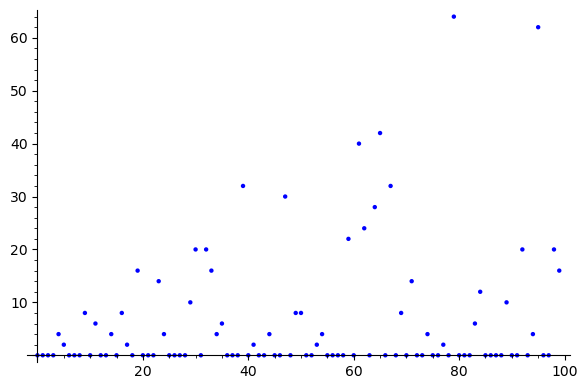

In [33]:
points(D.items())

In [34]:
max(D.values())

64

In [35]:
D

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 4,
 5: 2,
 6: 0,
 7: 0,
 8: 0,
 9: 8,
 10: 0,
 11: 6,
 12: 0,
 13: 0,
 14: 4,
 15: 0,
 16: 8,
 17: 2,
 18: 0,
 19: 16,
 20: 0,
 21: 0,
 22: 0,
 23: 14,
 24: 4,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 10,
 30: 20,
 31: 0,
 32: 20,
 33: 16,
 34: 4,
 35: 6,
 36: 0,
 37: 0,
 38: 0,
 39: 32,
 40: 0,
 41: 2,
 42: 0,
 43: 0,
 44: 4,
 45: 0,
 46: 0,
 47: 30,
 48: 0,
 49: 8,
 50: 8,
 51: 0,
 52: 0,
 53: 2,
 54: 4,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 22,
 60: 0,
 61: 40,
 62: 24,
 63: 0,
 64: 28,
 65: 42,
 66: 0,
 67: 32,
 68: 0,
 69: 8,
 70: 0,
 71: 14,
 72: 0,
 73: 0,
 74: 4,
 75: 0,
 76: 0,
 77: 2,
 78: 0,
 79: 64,
 80: 0,
 81: 0,
 82: 0,
 83: 6,
 84: 12,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 10,
 90: 0,
 91: 0,
 92: 20,
 93: 0,
 94: 4,
 95: 62,
 96: 0,
 97: 0,
 98: 20,
 99: 16}

In [36]:
powers = 4
L = []
for i in D:
    if D[i] == powers:
        L.append((i,powers))
        powers *= 2

In [37]:
L

[(4, 4), (9, 8), (19, 16), (39, 32), (79, 64)]

Si cette chose est une droite, elle doit passer par $(4,4)$ et (8,9):

In [41]:
var('a,b')
solve([4*a+b==4,9*a+b==8],[a,b])

[[a == (4/5), b == (4/5)]]

Il s'agit de la fonction affine $x\mapsto 4/5(x+1)$.

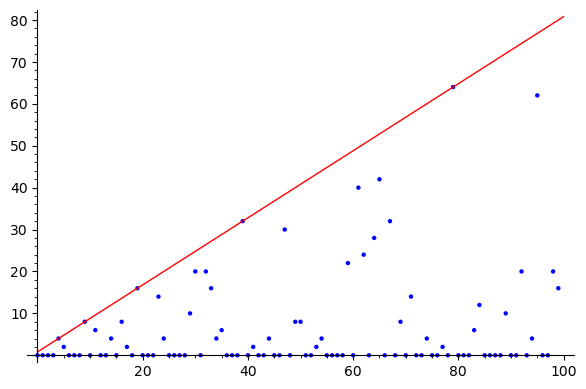

In [42]:
var('x')
points(D.items()) + plot(4*(x+1)/5, xmin=0, xmax=100, color='red')

Y'a peut-être quelque chose, mais histoire de pas se ridiculiser avec une conjecture impossible, on peut s'assurer qu'aux ordonnées puissances de 2 correspondent des abscices entières. On resoud :

In [43]:
var('x,n')
s = solve(4*(x+1)/5 == 2^n, [x], solution_dict=True)
s[0][x].simplify()

5*2^(n - 2) - 1

On y comprend toujours rien, mais on peut se demander si notre conjecture a une valeur prédictive.

Le point suivant sur la droite des super-leaders doit se trouver aux coordonnées :

In [44]:
n = 7
(5*2^(n - 2) - 1, 2^n) 

(159, 128)

In [49]:
bouton_to_lumiere(159).right_kernel().dimension()

128

Aha, on en essaie un de plus :

In [50]:
n = 8
(5*2^(n - 2) - 1, 2^n) 

(319, 256)

In [51]:
%time bouton_to_lumiere(319).right_kernel().dimension()

CPU times: user 2min 34s, sys: 506 ms, total: 2min 34s
Wall time: 2min 34s


256

2 minutes 30 de réchauffement climatique.

In [ ]:
bouton_to_lumiere(159).right_kernel().dimension()

Quel talent ! À nous la gloire !

Si on a du réseau, on peut voir si cette suite est apparue dans un autre contexte (si oui, ça peut permettre ensuite d'établir une bijection avec les objets qui sont comptés de la même façon, et de comprendre la structure sous-jacente, si elle existe) :

In [52]:
oeis(nontriv)

0: A117870: Square board sizes for which the lights out problem does not have a unique solution (counting solutions differing only by rotation and reflection as distinct).

In [53]:
_[0].show()

ID
A117870

NAME
Square board sizes for which the lights out problem does not have a unique solution (counting solutions differing only by rotation and reflection as distinct).

FIRST TERMS
(4, 5, 9, 11, 14, 16, 17, 19, 23, 24, 29, 30, 32, 33, 34, 35, 39, 41, 44, 47, 49, 50, 53, 54, 59, 61, 62, 64, 65, 67, 69, 71, 74, 77, 79, 83, 84, 89, 92, 94, 95, 98, 99, 101, 104, 107, 109, 113, 114, 118, 119, 123, 124, 125, 126, 128, 129, 131, 134, 135, 137, 139, 143)

COMMENTS
0: Numbers k such that a k X k parity pattern exists (see A118141). - _Don Knuth_, May 11 2006

LINKS
0: https://oeis.org/A117870/b117870.txt
1: http://www.jaapsch.net/puzzles/lomath.htm
2: http://dx.doi.org/10.1007/BF03023823
3: http://mathworld.wolfram.com/LightsOutPuzzle.html
4: https://en.wikipedia.org/wiki/Lights_Out_(game)

FORMULAS
0: a(n) = A093614(n) - 1.
1: Contains positive integers k such that A159257(k) > 0. - _Max Alekseyev_, Sep 17 2009

CROSS REFERENCES
('A075462', 'A076437', 'A117872', 'A076436')

PROGRAMS
[

### Il se passe quoi quand un système linéaire n'a aucune solution ?

Au lieu d'essayer d'obtenir la configuration tout allummée, on peut se donner des objectifs différents.

Par exemple tout allumé sauf le coin en haut à gauche:

In [54]:
o = objectif(5)

In [55]:
o[0,0] = 0

In [56]:
grille(o)

[0 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]

In [57]:
bouton_to_lumiere(5).solve_right(o)

ValueError: matrix equation has no solutions

Le problème est que lorsqu'aucune solution n'existe, la méthode `.solve_right` ne peut pas renvoyer de vecteur, et plutôt que de renvoyer `False` (ce qui ferait des sorties de type différents), elle crée une erreur, en l'occurrence `
ValueError: matrix equation has no solutions`.

Ainsi, plutôt que de demander s'il existe des solutions, il faut essayer de résoudre, et récupérer les erreurs. Ceci traduit un des points de la philosophie Python : « Easier to ask for forgiveness than permission » https://docs.python.org/2/glossary.html#term-eafp

In [64]:
def has_solution(lumiere):
    n = sqrt(len(vector(lumiere)))
    try:
        if bouton_to_lumiere(n).solve_right(lumiere):
            return True
    except ValueError:
        return False

In [65]:
has_solution(objectif(5))

True

In [67]:
has_solution(o)

False